Total VMs: 2695548
Total CPU readings: 10000000


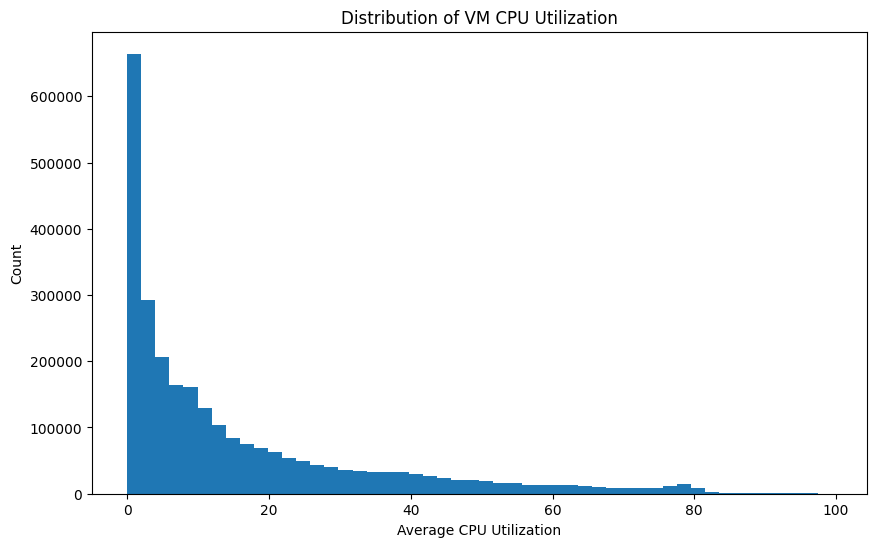

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load VM data
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
vm_data = pd.read_csv('data/vmtable.csv', header=None, names=headers)

# Load CPU readings
cpu_headers = ['vmid', 'timestamp', 'cpu_utilization']
cpu_readings = pd.read_csv('data/vm_cpu_readings-file-1-of-195.csv', header=None, names=cpu_headers)

# Explore data
print(f"Total VMs: {vm_data.shape[0]}")
print(f"Total CPU readings: {cpu_readings.shape[0]}")

# Plot CPU utilization distribution
plt.figure(figsize=(10,6))
plt.hist(vm_data['avgcpu'], bins=50)
plt.xlabel('Average CPU Utilization')
plt.ylabel('Count')
plt.title('Distribution of VM CPU Utilization')
plt.show()

In [ ]:
# Example: Create time-series features from CPU readings
def create_features(df):
    # Group by VM ID and compute statistics in windows
    features = df.groupby('vmid').agg({
        'cpu_utilization': ['mean', 'std', 'max', 'min', 
                           lambda x: np.percentile(x, 95),
                           lambda x: np.percentile(x, 99)]
    })
    
    # Flatten column names
    features.columns = ['_'.join(col).strip() for col in features.columns.values]
    
    # Add rate-of-change features
    # You'd need consecutive readings for this
    
    return features

vm_features = create_features(cpu_readings)
print(vm_features.head())